In [268]:
import pandas as pd 
import numpy as np 
import random
# import plotly.express as px
from math import comb, pow
from sys import stdout
from matplotlib import pyplot as plt
import seaborn as sns

In [269]:
'''
Modelo de Ehrenfest

La cadena de ehrenfest fue desarrollado para modelar el intercambio de moleculas entre dos contenedores. 

En cada tiempo una molecula es seleccionada de manera aleatoria y se traspasa al otro contenedor.


Espacio de estados: {0, 1, ..., n}

'''


def move_ball(state: int, n:int) -> int:
    ''' 
    Mediante esta función calculamos el estado de nuestro modelo de ehrenfast en el siguiente tiempo.
    global:
        state
    '''
    threshold = state/n
    if random.random()>threshold:
        state += 1
    else:
        state -= 1
    return state

def zero_fill(distribution: dict, n: int):
    ''' Llena los valores faltantes con 0's'''
    for i in range(n+1):
        if not i in distribution:
            distribution[i] = 0
    return distribution

def value_convergence(distributions: dict, n:int):
    ''' Regresa un diccionario con la probabilidad simulada de cada estado.'''
    evolutions = {}
    for i in range(n+1):
        evolutions[i] = []
    for distribution in distributions:
        for i in distribution:
            evolutions[i].append(distribution[i])
    return evolutions
            
# def plot_convergence(distributions:pd.Series):
#     ''' Genera un plot con la convergencia de probabilidad de cada estado.'''
#     if not isinstance(distributions, pd.Series):
#         distributions = pd.Series(distributions)
#     evolutions = value_convergence(distributions)
#     px.line(evolutions)
    
def theoric_distribution(n:int):
    ''' Calculamos la distribución estacionaria de una cadena de Ehrenfest de n bolas.'''
    idx = []
    probabilities = []
    for i in range(n + 1):
        idx.append(i)
        probabilities.append(comb(n, i)*pow(1/2, n))
    return pd.Series(index = idx, data = probabilities)

def simulation_error(theoric:pd.Series, simulated_distribution:pd.Series) -> pd.Series:
    ''' Calcula los errores en entre una simulación y la distribución teorica de una cadena de Ehrenfast'''
    global distributions
    if not isinstance(simulated_distribution, pd.Series):
        simulated_distribution = pd.Series(simulated_distribution)
    return abs(theoric - simulated_distribution)

    
def calculate_errors(theoric_distribution: pd.Series, distributions:list, metric:str = 'mae') -> pd.Series:
    ''' Calcula el error medio de una simulación en cada iteración.'''
    if not metric.lower() in ['mae','mse']:
        raise ValueError(f'metric "{metric}" is not a valid metric.')
    errors = []
    for distribution in distributions:
        if metric == 'mae':
            errors.append(simulation_error(theoric_distribution, distribution).mean())
        else:
            errors.append((simulation_error(theoric_distribution, distribution)**2).mean())
    return pd.Series(errors)

# def plot_errors(errors:pd.Series, metric:str):
#     ''' Genera un plot de errores medios'''
#     if not isinstance(errors, pd.Series):
#         errors = pd.Series(errors)
#     errors = errors[errors.index%10 == 0]
#     return px.line(errors, title = f'{metric} error', labels = {'value':metric , 'index':'iterations'})


### A continuación comparamos la distribución simulada de una cadena Ehrenfast y la comparamos con su distribución teoríca.

### Sabemos que la distribución estacionaria del modelo de ehrenfest con $n$ bolas es
### $f(x) = {n \choose x}(\frac{1}{2})^n, x \in S$

In [270]:
def make_plot(fig, axes:np.array, states:list, distributions:pd.Series, n:int):
    '''Genera un graficos para analizar la simulación realizada.'''
    if axes.shape != (3,):
        raise TypeError(f'Invalid axes.')
    fig.suptitle(f'Analisis de simulación: Ehrenfast {n} bolas.')
    ## Grafica de distribución.
    axes[0].plot(theoric_distribution(n), color = 'red')
    axes[0].hist(states, rwidth = .95, density = True)
    axes[0].set_title('Distribución')
    ## Grafica de convergencia de valores.
    vc = value_convergence(distributions, n)
    for key in vc:
        axes[1].plot(vc[key])
    axes[1].legend(vc.keys())
    axes[1].set_title('Densidad de estados.')
    ## Grafica de convergencia de valores:
    errors = calculate_errors(theoric_distribution(n), distributions)
    axes[2].plot(errors)
    axes[2].set_ylim(bottom = 0)
    axes[2].set_title('Error medio absoluto')
    return axes
    


In [271]:
def main(n_experimentos, estado_inicial, n):
    # 1. Realizamos experimentos con parametros indicados.
    states = []     # lista para almacenar resultados
    state = estado_inicial
    states = np.zeros(n_experimentos + 1, dtype = int)
    states[0] = estado_inicial 
    distributions = []

    for i in range(n_experimentos):
        if i%500 == 0:
            stdout.write(f'{(i/n_experimentos)*100:.1f}%')
            stdout.flush()
            if i!=0:
                stdout.write('\r')
        state = move_ball(state, n)
        states[i+1] = state
        
        vals, counts = np.unique(states[0:i+1], return_counts = True)
        counts = counts/counts.sum()
        
        t_distribution = {}
        for j in range(len(counts)):
            t_distribution[vals[j]] = counts[j]
        t_distribution = zero_fill(t_distribution, n)
        distributions.append(t_distribution)
    
    fig, axes = plt.subplots(3,1, figsize = (25, 15))
    axes = make_plot(fig, axes, states, distributions, n)
    





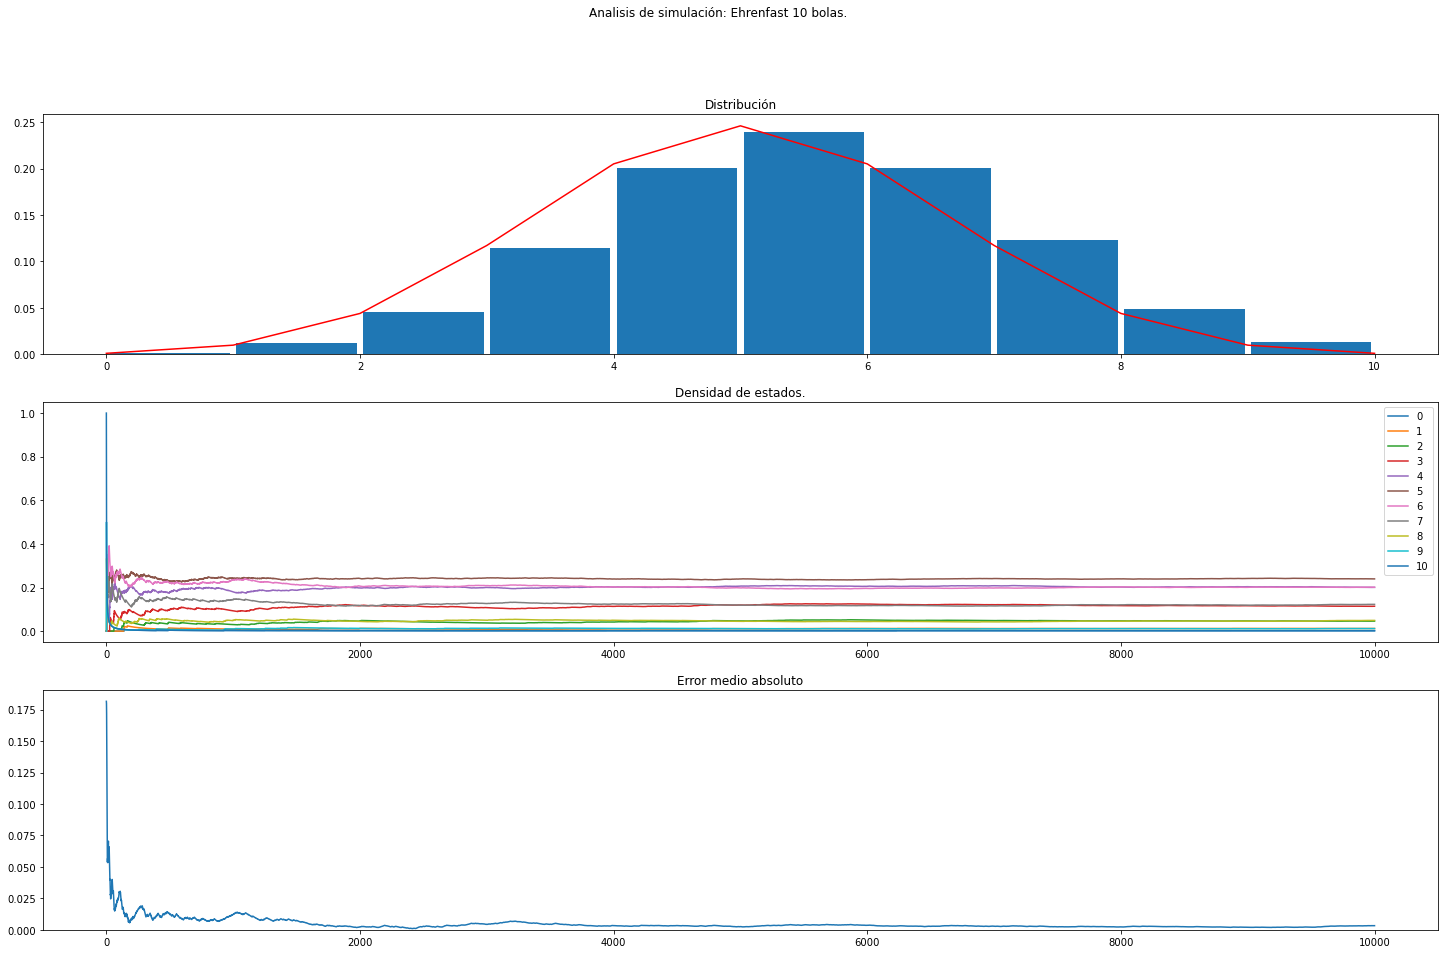

In [272]:
n = 10
n_experimentos = int(10e3)
estado_inicial = random.randint(0, n)

main(n_experimentos, estado_inicial, n)

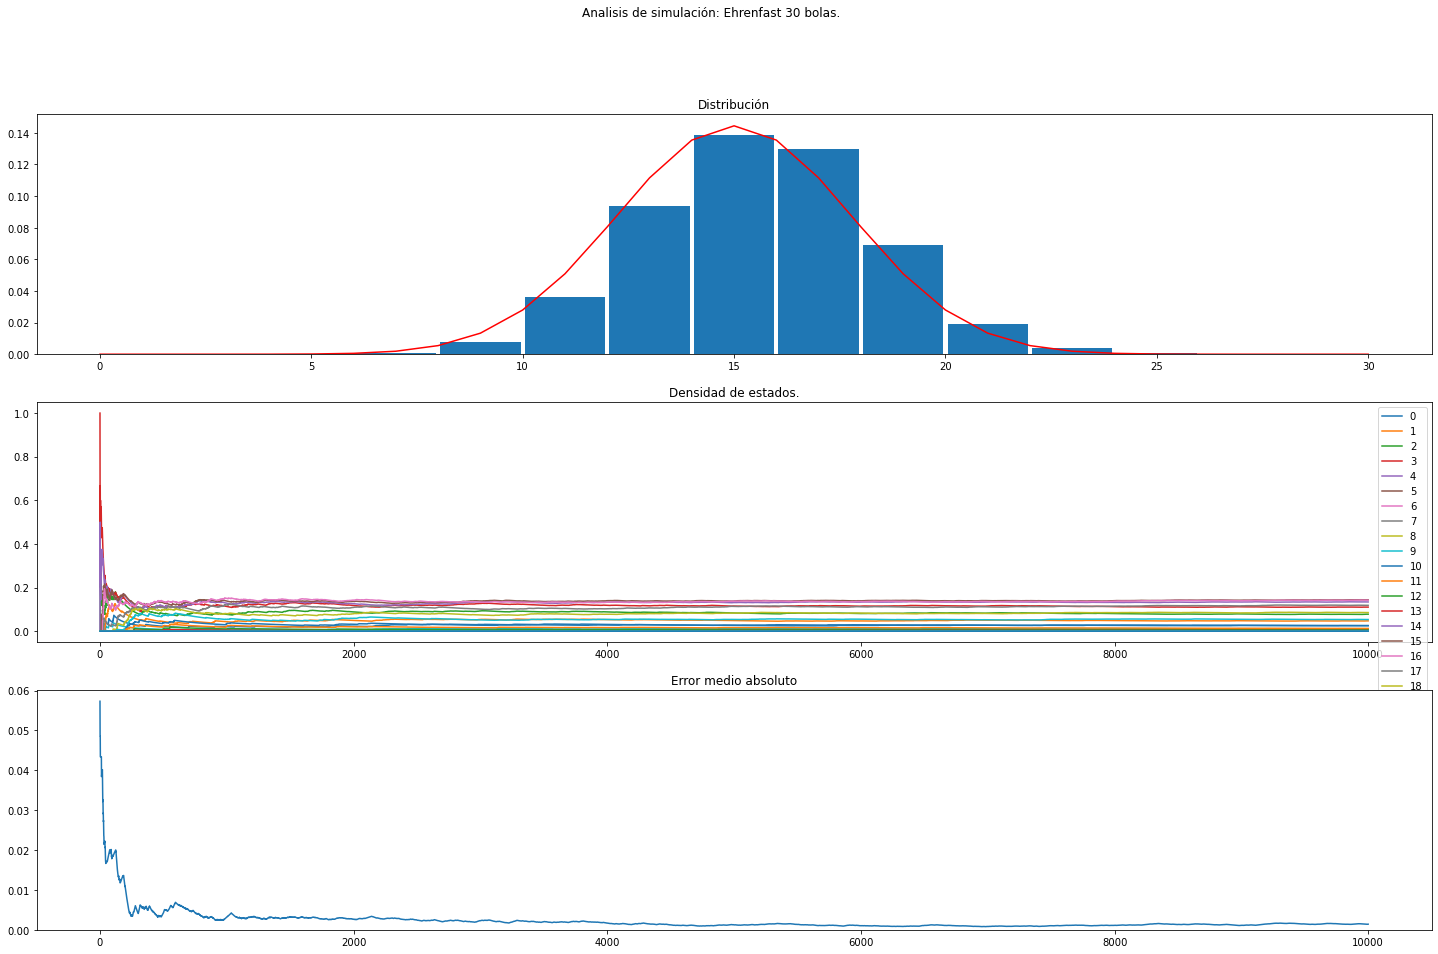

In [273]:
n = 30
n_experimentos = int(10e3)
estado_inicial = random.randint(0, n)

main(n_experimentos, estado_inicial, n)

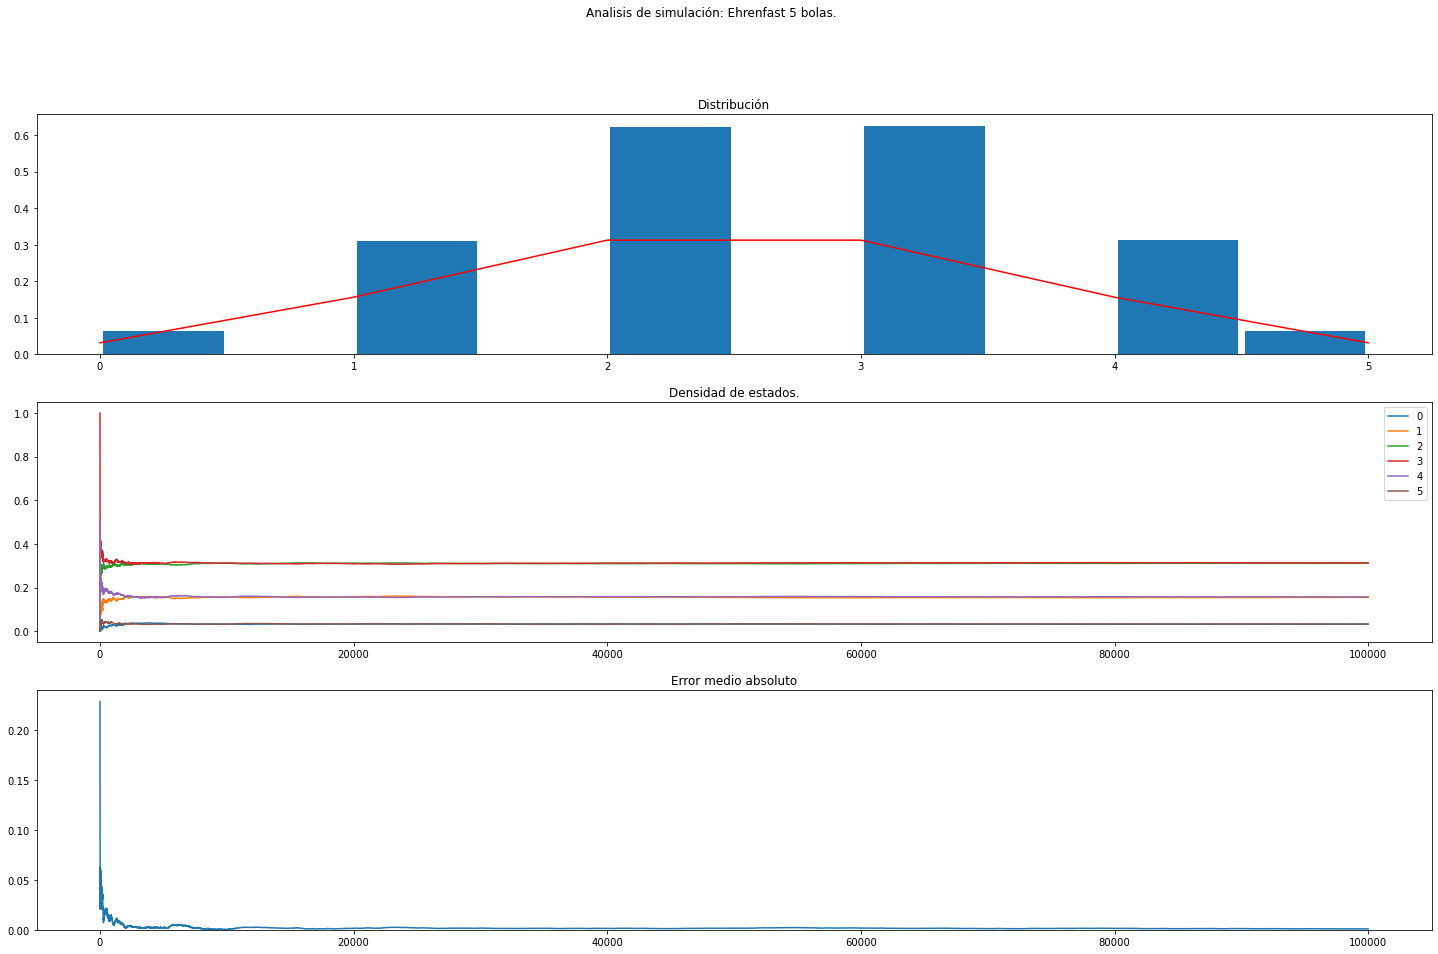

In [274]:
n = 5
n_experimentos = int(10e4)
estado_inicial = random.randint(0, n)

main(n_experimentos, estado_inicial, n)